In [152]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
import sklearn as sk
from numba import njit

Definición de la función seno:

$$
\sin (x) = \sum _{n=0} ^\infty \frac{-1^n}{(2n+1)!} x^{2n+1} = x - \frac{x^3}{3!} + \frac{x^5}{5!} + ...
$$

In [150]:
def mi_sin( x , N=10 ):
    y = 0
    for n in range(N):
        y += (-1)**n * (x**(2*n+1)/m.factorial(2*n+1))
    return y

@njit
def mi_sin_mejorado( x , N=10 ):
    y = 0
    factoriales = [1,6,120,5040,362880,39916800,6227020800,1307674368000,355687428096000,121645100408832000]
    exponentes = [1,3,5,7,9,11,13,15,17,19]
    for n in range(N):
        y += (-1)**n * (x**exponentes[n]/factoriales[n])
    return y

In [151]:
x = m.pi
print('Con mi función: \t', mi_sin(x) )
print('Con mi función v2: \t', mi_sin_mejorado(x) )
print('Con la función de math:\t', m.sin(x) )
print('Con la función de numpy:\t', np.sin(x) )

Con mi función: 	 -5.28918280357759e-10
Con mi función v2: 	 -5.289182672965142e-10
Con la función de math:	 1.2246467991473532e-16
Con la función de numpy:	 1.2246467991473532e-16


In [104]:
%%timeit
mi_sin(x)

3.38 µs ± 15.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [105]:
%%timeit
mi_sin_mejorado(x)

239 ns ± 3.34 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [106]:
%%timeit
m.sin(x)

54.8 ns ± 0.61 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [107]:
%%timeit
np.sin(x)

317 ns ± 1.03 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


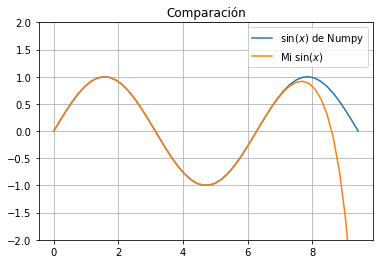

In [137]:
x = np.linspace(0,3*m.pi)
y_np = np.sin(x)
y_misin = mi_sin(x)
plt.plot(x,y_np,label=r"$\sin (x)$ de Numpy")
plt.plot(x,y_misin,label=r"Mi $\sin (x)$")
plt.ylim([-2,2])
plt.title('Comparación')
plt.legend(),plt.grid()
plt.show()

In [147]:
x = np.arange(1,10)
sp.gamma(x)

array([1.000e+00, 1.000e+00, 2.000e+00, 6.000e+00, 2.400e+01, 1.200e+02,
       7.200e+02, 5.040e+03, 4.032e+04])